# Model Exploration

<img src="../images/ml.jpg" width="800" height="400" />

To start off the Modelling we will look at different Models on a very basic Setup. As we are a Team of two we can't focus on all Models. So this is a first glance at different Models for the technical Analysis of Stock Prices of the JPX Stock Exchange to decide on which Models we want to work.

## Imports

As usual we first need to do some imports.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
import seaborn as sns
import plotly.express as px
import altair as alt
import numpy as np
from math import floor,ceil,sqrt
import sys
import datetime as dt
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

#if not sys.warnoptions:
    #warnings.simplefilter("ignore")
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from ipywidgets import HTML
from io import BytesIO
import base64

import warnings
warnings.simplefilter("ignore")

# Turn off the max column width so the images won't be truncated
pd.set_option('display.max_colwidth', None)

# Show all Columns
pd.set_option('display.max_columns', None)
 
# Turning off the max column will display all the data
pd.set_option('display.max_seq_items', 3)

In [2]:
df_all = pd.read_csv('../data/out.csv')

## Dataset

Lets have a quick glance at the Dataset we are working with. Which we enhanced in the Feature Engineering.

In [3]:
df_all.head(3)

,Date,SecuritiesCode,ExpectedDividend,Open,High,Low,Close,Volume,Target,BOP,Cpos,bsforce,Opos,av,vwap,HLr,OCr,relC,OC,HL,logC,logR,OHLCstd,OHLCskew,OHLCkur,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,others_dr,others_dlr,others_cr,0,1
0,2017-01-04,1301,0.0,2734.0,2755.0,2730.0,2742.0,31400.0,0.000730,-0.320000,-0.020000,-628.000000,-0.340000,2742.333333,2742.0,25.0,-8.0,0.002926,7496628.0,7521150.0,7.916807,0.002922,11.026483,0.941530,0.008495,3,0,0,1,0,0,2742.6,2725.75,2847.54,3088.225,3377.878,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,-1256.000000,31400.0,0.166846,39287.798568,-1.005587e+05,-145816.395088,16349.489506,2724.766606,34.909101,1000.000000,2725.75,2759.548669,2691.951331,2.479954,0.63684,0.0,0.0,2724.3,2767.333333,2717.333333,1.666483,0.493333,0.0,0.0,2681.0,2755.0,2718.0,2.714849,0.72973,0.0,1.127384,0.169958,17.491613,14.043442,2723.833333,2726.692308,2720.375581,2729.511689,0.939103,1.016026,-0.076923,0.331956,26.148689,-39.75,99.490177,99.490177,0.0,2718.5,2718.0,2724.5,2742.5,91.753071,0.0,0.0,0.0,23.76926,2463.600751,2472.555224,16.0,36.0,-20.0,0.0,0.0,49.268322,1.0,1.0,1.0,61.746435,63.328442,62.162162,67.296063,-37.837838,90.302941,-0.802334,0.006227,0.633344,0.503976,-9.943798,6.969853,6.072601,11.463714,-0.145985,0.000000,1.0,0.0
1,2017-01-05,1301,0.0,2743.0,2747.0,2735.0,2738.0,17900.0,0.002920,0.416667,-0.250000,-4475.000000,0.166667,2740.000000,2738.0,12.0,5.0,-0.001823,7510334.0,7513045.0,7.915348,-0.001824,5.315073,0.198134,-2.215052,4,0,0,0,1,0,2742.6,2725.75,2847.54,3088.225,3377.878,2740.666667,2741.619048,2741.843137,2741.960199,2741.984032,-10206.000000,13500.0,0.166846,39287.798568,-1.005587e+05,-145816.395088,3573.494020,2724.766606,34.909101,998.541211,2725.75,2759.548669,2691.951331,2.479954,0.63684,0.0,0.0,2724.3,2759.666667,2722.666667,1.666483,0.414414,0.0,0.0,2681.0,2755.0,2718.0,2.714849,0.72973,0.0,1.127384,0.169958,17.491613,14.043442,2723.833333,2726.692308,2720.375581,2729.511689,0.939103,1.016026,-0.076923,0.331956,26.148689,-39.75,99.490177,99.490177,0.0,2718.5,2718.0,2724.5,2742.5,91.753071,0.0,0.0,0.0,23.76926,2463.600751,2472.555224,16.0,36.0,-20.0,0.0,0.0,49.268322,1.0,1.0,1.0,61.746435,63.328442,62.162162,67.296063,-37.837838,90.302941,-0.802334,0.006227,0.633344,0.503976,-9.943798,6.969853,6.072601,-0.145879,-0.145985,-0.145879,1.0,0.0
2,2017-01-06,1301,0.0,2734.0,2744.0,2720.0,2740.0,19900.0,-0.001092,-0.250000,0.333333,6633.333333,0.083333,2734.666667,2740.0,24.0,-6.0,0.002195,7491160.0,7463680.0,7.916078,0.002192,10.503968,-1.164860,1.085094,5,0,0,0,0,1,2742.6,2725.75,2847.54,3088.225,3377.878,2740.444444,2741.464853,2741.770857,2741.940695,2741.976112,3060.666667,33400.0,0.166846,

We have decided to predict a single stock first. We chose Stock 3167.

In [32]:
# Choose Securitie and Testsize in Days
Code = 4628
testsize = 30

# setting the stocks to chosen Securitie
df = df_all.loc[df_all['SecuritiesCode'] == Code]

#adjusting Models to Testsize
Size = (len(df.index)-testsize)/len(df.index)


### Plotting the Stock

Text(0.5, 1.0, 'Stock Price of the chosen Stock over the Years')

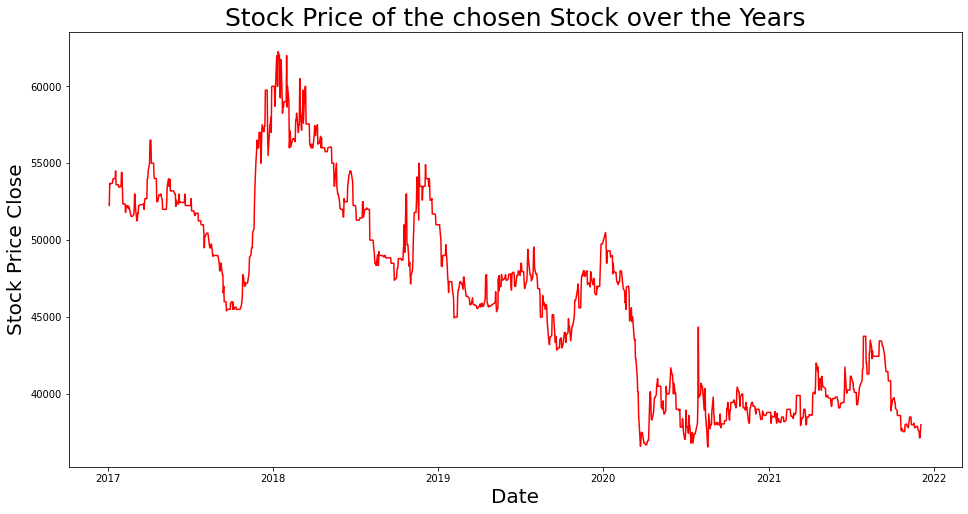

In [33]:
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history',color='r')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price Close',size=20)
plt.title('Stock Price of the chosen Stock over the Years',size=25)

### Defining Train- and Validation-Datasets

Lets define the Test- and Training-Dataset for our Experiments.

In [35]:
shape=df.shape[0]
df_new=df[['Close']]
df_new.head()
train_set=df_new.iloc[:ceil(shape*Size)]
valid_set=df_new.iloc[ceil(shape*Size):]

print('Training Size',train_set.shape)
print('Test Size',valid_set.shape)

Training Size (1172, 1)
Test Size (30, 1)


## Model 1: Moving Average

In statistics, a moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis.

In [7]:
def moving_avg_prediction(df):
    preds = []
    for i in range(0,valid_set.shape[0]):
        a = train_set['Close'][len(train_set)-valid_set.shape[0]+i:].sum() + sum(preds)
        b = a/(valid_set.shape[0])
        preds.append(b)

    rmse = mean_squared_error(valid_set['Close'],preds,squared=False)
    mape =mean_absolute_percentage_error(valid_set['Close'],preds)

    print('RMSE on validation set:',rmse)
    print('Mape on validation set:',mape)

    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Moving Averages',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])
    

RMSE on validation set: 1012.0471646648881
Mape on validation set: 0.15304361432382577


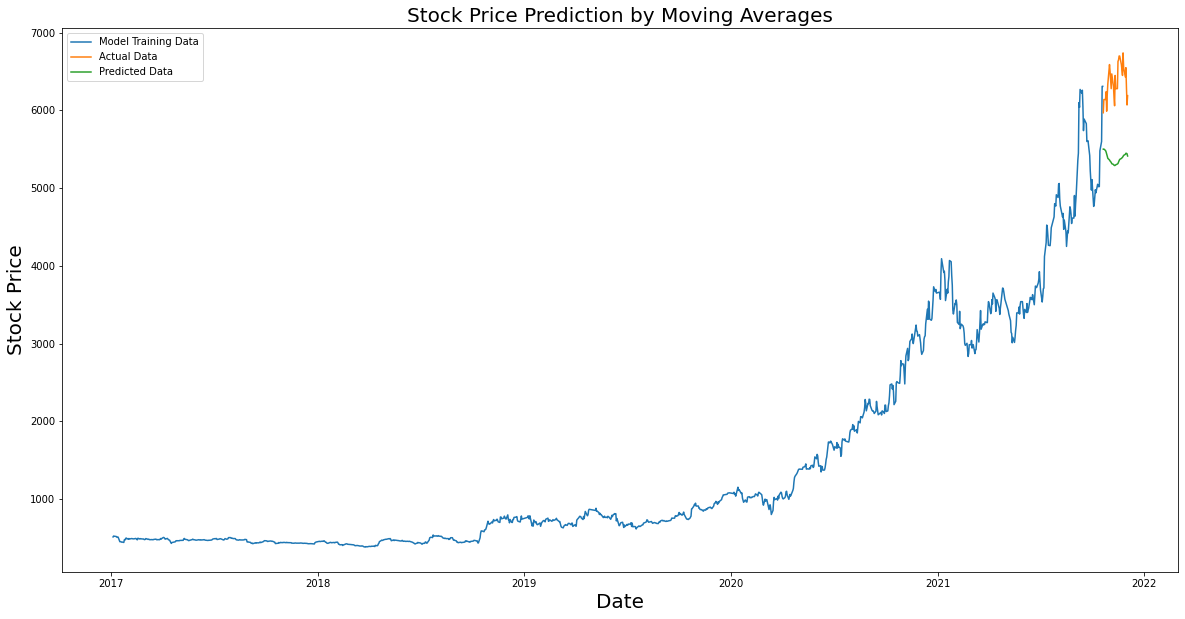

In [8]:
moving_avg_prediction(df)

## Model 2: Linear Regression

Linear regression is probably one of the most well known and well understood algorithms in statistics and machine learning. It is used to predict the value of a variable based on the value of another variable. 

In [9]:
def linear_regression_prediction(df):
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))

    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    mape =mean_absolute_percentage_error(valid_set['Close'],preds)

    print('RMSE on validation set:',rms)
    print('Mape on validation set:',mape)

    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('JPK Stock Price Prediction by Linear Regression',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

RMSE on validation set: 2963.922822599852
Mape on validation set: 0.46377505886901077


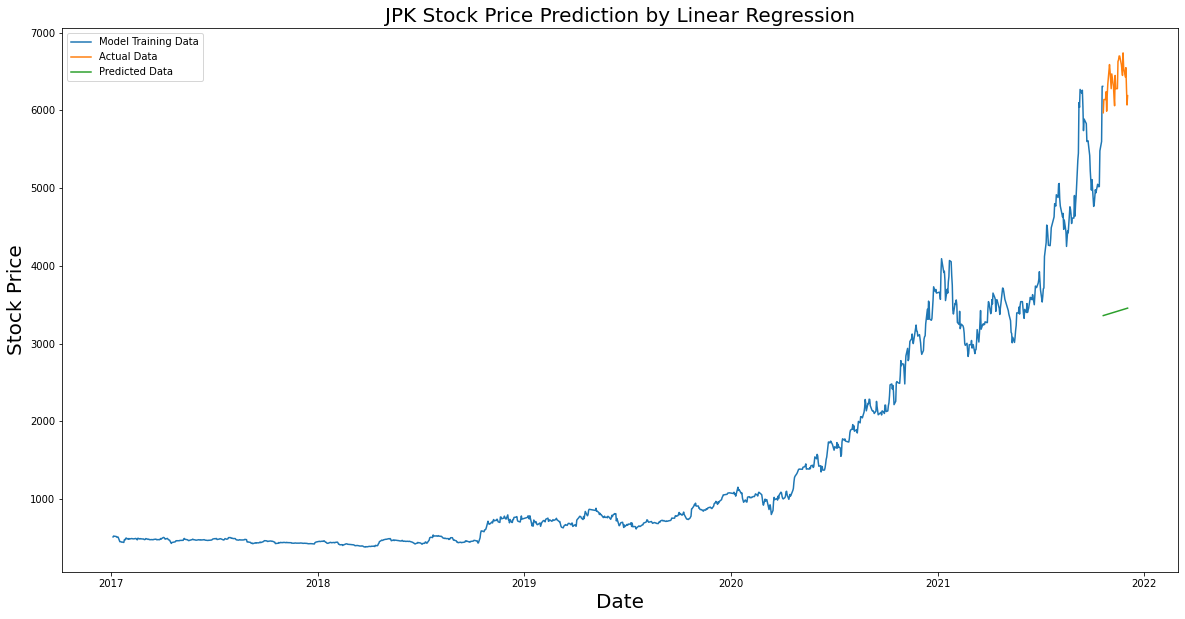

In [10]:
linear_regression_prediction(df)

## Model 3: K-Nearest Neighbours

In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method. It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set. 

In [11]:
def k_nearest_neighbours_predict(df):
    train=train_set.reset_index()
    valid=valid_set.reset_index()

    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]

    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)

    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)

    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    mape =mean_absolute_percentage_error(valid_set['Close'],preds)

    print('RMSE on validation set:',rms)
    print('Mape on validation set:',mape)

    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by K-Nearest Neighbors',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

RMSE on validation set: 5036.648695413132
Mape on validation set: 0.7484834792720668


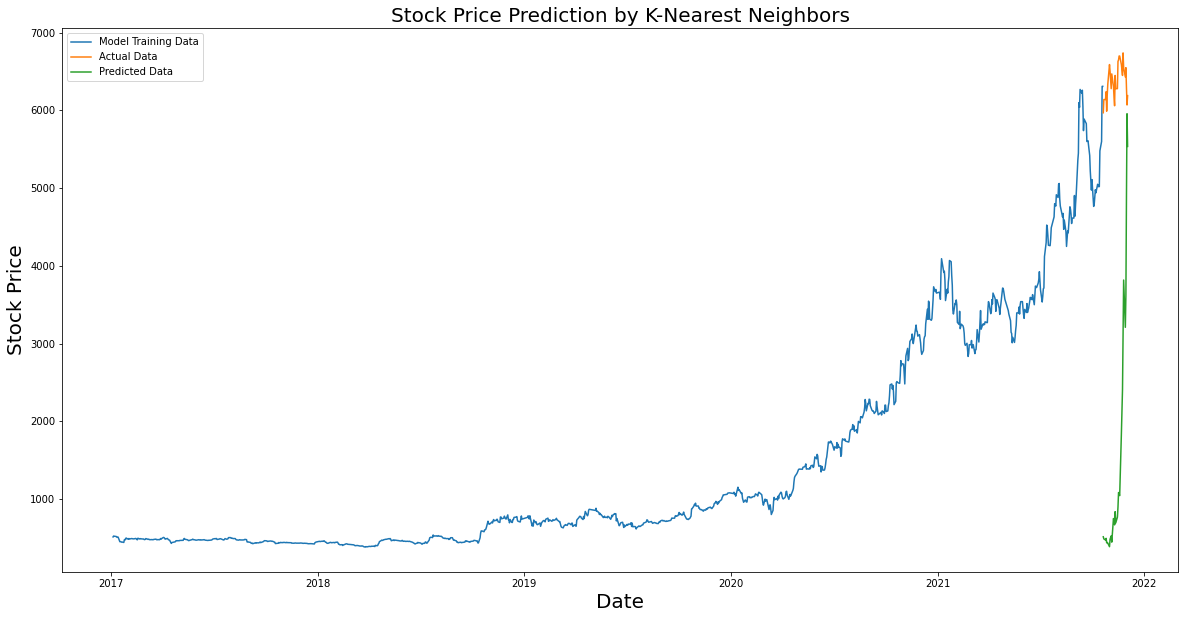

In [12]:
k_nearest_neighbours_predict(df)

The RMSE 140.01 value is almost similar to the linear regression model and the plot shows the same pattern. Like linear regression, kNN also identified a drop in January 2019 and 2020.
We can safely conclude that regression algorithms have not performed well on this dataset.

## Model 4: Auto-ARIMA


Usually, in the basic ARIMA model, we need to provide the p,d, and q values which are essential. We use statistical techniques to generate these values by performing the difference to eliminate the non-stationarity and plotting ACF and PACF graphs. In Auto ARIMA, the model itself will generate the optimal p, d, and q values which would be suitable for the data set to provide better forecasting.

In [13]:
import statsmodels.api as sm

In [14]:
def auto_arima_prediction(df):
    training = train_set['Close']
    validation = valid_set['Close']

    model = auto_arima(training,param=3, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
    model.fit(training)
    forecast = model.predict(n_periods=ceil(floor(df.shape[0]*(len(valid_set.index)/(len(valid_set)+len(train_set))))))
    forecast = pd.DataFrame(forecast,index = valid_set.index,columns=['Prediction'])

    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-np.array(forecast['Prediction'])),2)))
    mape =mean_absolute_percentage_error(valid_set['Close'],forecast['Prediction'])
   
    print('RMSE on validation set:',rms)
    print('Mape on validation set:',mape)

    plt.plot(train_set['Close'])
    plt.plot(valid_set['Close'])
    plt.plot(forecast['Prediction'])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Auto ARIMA',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=13892.294, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=13589.792, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=13875.533, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=13482.779, Time=0.77 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.93 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=13481.989, Time=0.50 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=13588.974, Time=0.15 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.42 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=13483.074, Time=0.67 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=13463.660, Time=2.05 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AI

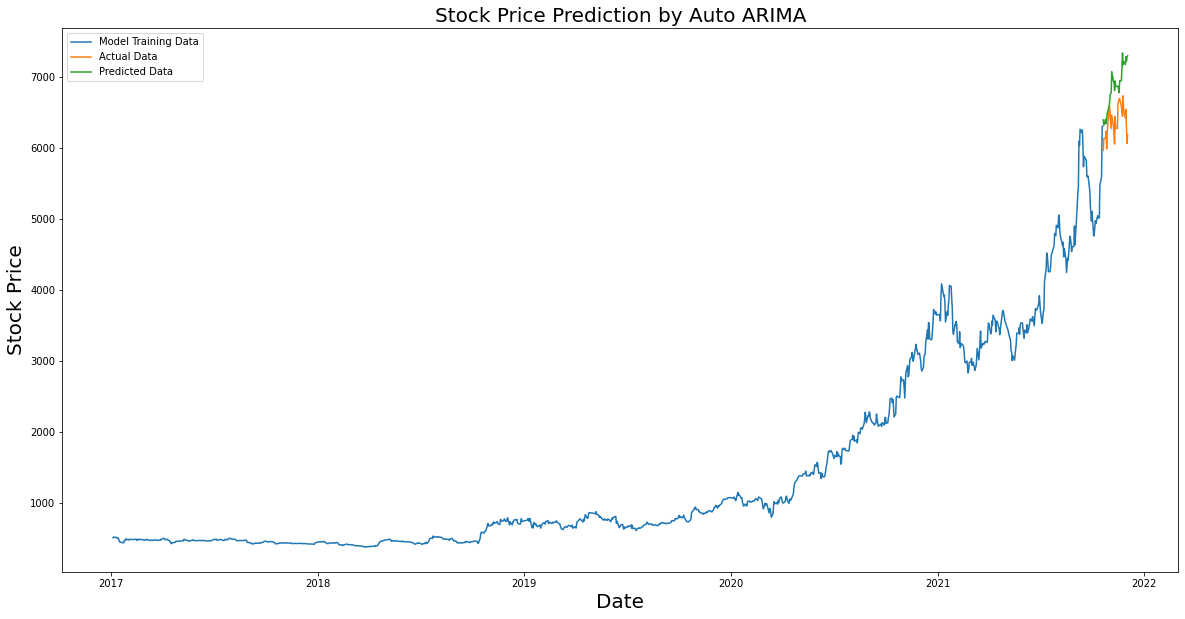

In [15]:
auto_arima_prediction(df)

## Model 5: Sarimax

SARIMAX (Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is an updated version of the ARIMA model. The new part of this model is that there is allowed to be a annual seasonal effect.

In [16]:
def auto_sarimax_prediction(df):
    training = train_set['Close']
    validation = valid_set['Close']
    model = auto_arima(training, start_P=1,
                       start_q=1,
                       max_p=3,
                       max_q=3,
                       m=12,
                       seasonal=True,
                       d=None,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True,
                       order=(3, 0, 0),
                       seasonal_order=(2, 1, 0, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
    model.fit(training)

    forecast = model.predict(n_periods=ceil(floor(df.shape[0]*(len(valid_set.index)/(len(valid_set)+len(train_set))))))
    forecast = pd.DataFrame(forecast,index = valid_set.index,columns=['Prediction'])
    
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-np.array(forecast['Prediction'])),2)))
    mape =mean_absolute_percentage_error(valid_set['Close'],forecast['Prediction'])

    print('RMSE on validation set:',rms)
    print('Mape on validation set:',mape)

    plt.plot(train_set['Close'])
    plt.plot(valid_set['Close'])
    plt.plot(forecast['Prediction'])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Auto SARIMAX',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=3.86 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=13892.294, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=13589.792, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=13875.533, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=13482.779, Time=0.82 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=13481.989, Time=0.84 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=13588.974, Time=0.15 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.38 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=13483.074, Time=0.77 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=13463.660, Time=2.27 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AI

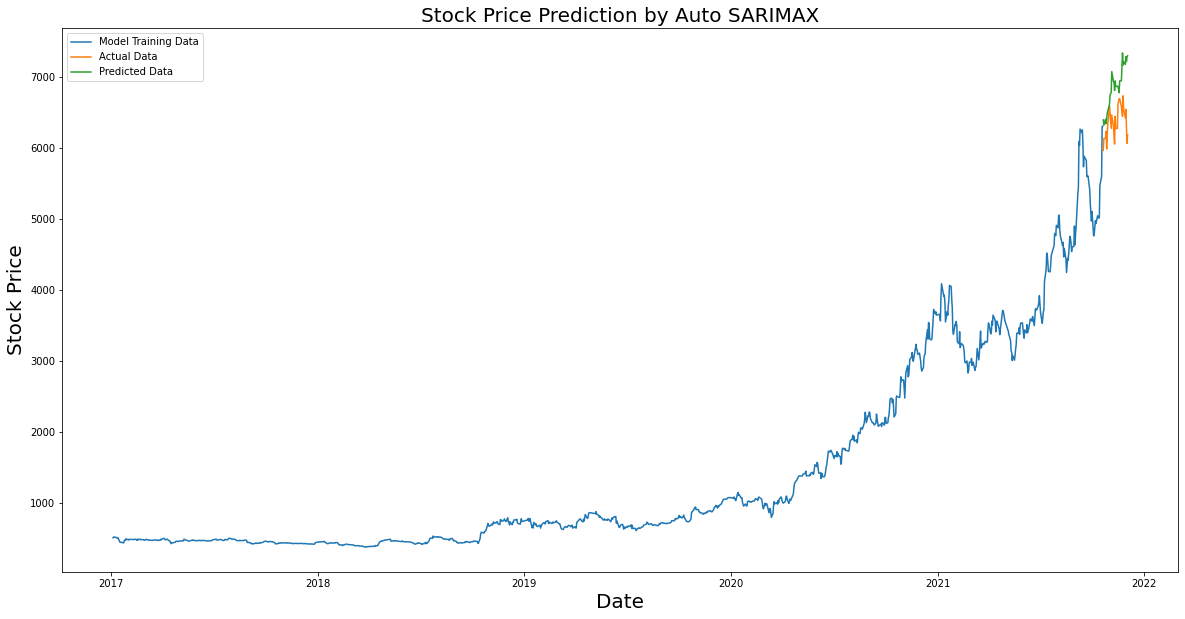

In [17]:
auto_sarimax_prediction(df)

## Model 6: Prophet

Prophet is open source software released by Facebook’s Core Data Science team. It is fully automatic and easy to implement. It tries to capture the seasonality in the past data and works well when the dataset is large.

In [25]:
def fb_prophet_prediction(df):
    shape=df.shape[0]
    df_newf=df[['Close']]
    df_newf.reset_index(inplace=True)
    df_newf['Date'] = pd.to_datetime(df_newf.Date,format='%Y-%m-%d')
    df_newf.index = df_newf['Date']
    df_newf.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
    train_set=df_newf.iloc[:ceil(shape*Size)]
    valid_set=df_newf.iloc[ceil(shape*Size):]

    model = Prophet(
                    yearly_seasonality=True,
                    weekly_seasonality=True,
                    daily_seasonality=True)
    model.fit(train_set)
    close_prices = model.make_future_dataframe(periods=len(valid_set))
    forecast = model.predict(close_prices)
    forecast_valid = forecast['yhat'][ceil(shape*Size):]

    rms=np.sqrt(np.mean(np.power((np.array(valid_set['y'])-np.array(forecast_valid)),2)))
    mape =mean_absolute_percentage_error(valid_set['y'],forecast_valid)
    
    print('RMSE on validation set:',rms)
    print('Mape on validation set:',mape)

    valid_set['Predictions'] = forecast_valid.values
    plt.plot(train_set['y'])
    plt.plot(valid_set[['y', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by FB Prophet',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

Initial log joint probability = -4.3714
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3332.77    0.00156895       715.926           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3386.72     0.0154236       466.506           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3442.5   0.000415413       323.421           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       3450.71   0.000471935       438.172   2.261e-06       0.001      433  LS failed, Hessian reset 
     399       3465.47   0.000828684       728.955     0.04422      0.9885      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3478.75   0.000714621     

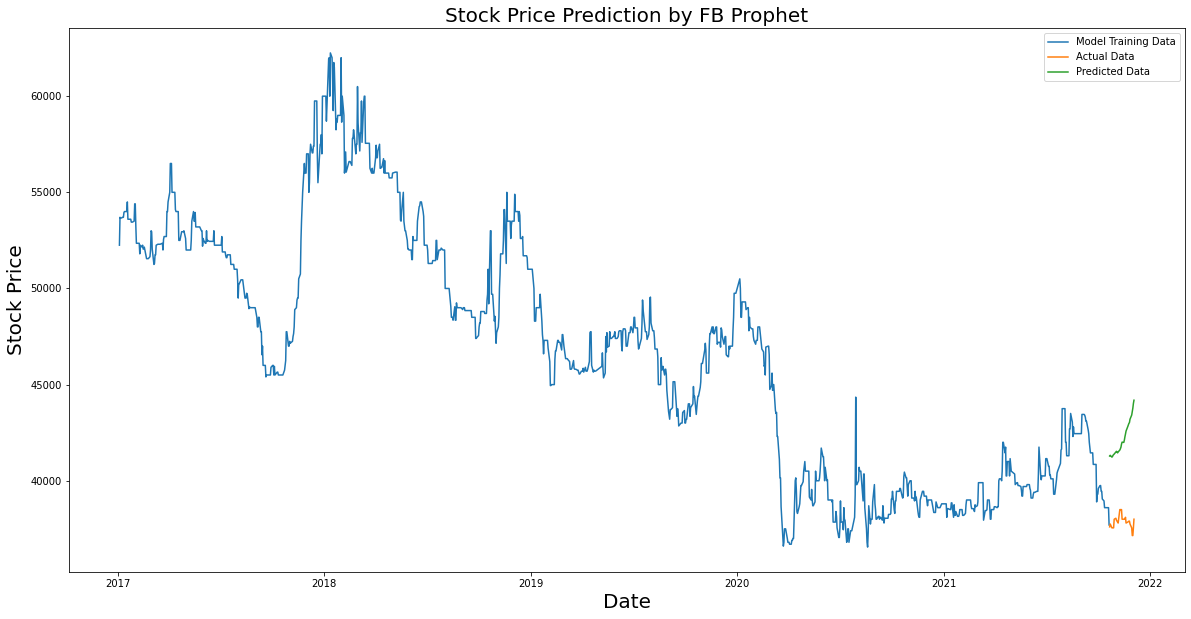

In [26]:
fb_prophet_prediction(df)

## Model 7: Long Short Term Memory (LSTM)

Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network can process not only single data points (such as images), but also entire sequences of data (such as speech or video). 

In [58]:
def lstm_prediction(df):

    dataset = df_new.values
    train=train_set
    valid=valid_set

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()

    # Units == number of Neurons
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')


    model.fit(x_train, y_train,epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)

    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    mape =mean_absolute_percentage_error(valid['Close'],closing_price)

    print('RMSE on validation set:',rms)
    print('Mape on validation set:',mape)

    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

2022-06-07 16:06:32.602884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-07 16:06:32.811975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-07 16:06:32.917114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-07 16:06:33.008358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-07 16:06:33.145231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1132/1132 - 23s - loss: 0.0036 - 23s/epoch - 20ms/step


2022-06-07 16:06:54.503057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-07 16:06:54.574413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-07 16:06:54.641468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


RMSE on validation set: Close          422.827101
Predictions    305.014472
dtype: float64
Mape on validation set: 0.0096438646934301


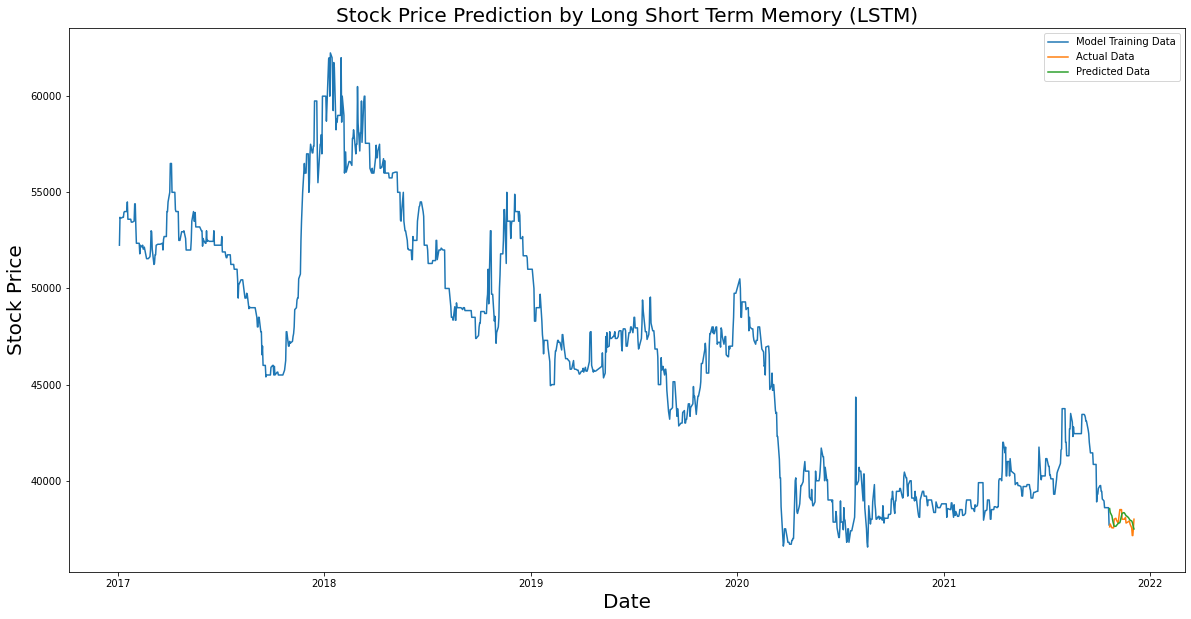

In [59]:
lstm_prediction(df)

We decided to have a closer Look at the LSTM-Model and FB-Prophet in the Subsequent Notebooks, as they seem promising.